In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('optdigits.tra',header=None)

In [3]:
test_df = pd.read_csv('optdigits.tes',header=None)

In [4]:
X_train,  y_train  = df.iloc[:, : 64] , df.iloc[:, -1: ]
y_train = y_train[64]

In [5]:
X_test,  y_test  = test_df.iloc[:, : 64] , test_df.iloc[:, -1: ]
y_test = y_test[64]

In [6]:
#Calculates the sigmoid value of the input value
def sigmoid(z):
    value = 1 / (1 + np.exp(-z))
    return value

# Calculates the cost 
def Cost(z, y):
    m = len(y)
    cost = (1 / m) * (np.sum(-y.T.dot(np.log(z)) - (1 - y).T.dot(np.log(1 - z))))
    return cost
    
# Calculates the weights by gradient descent
def gradient_descent(X,h,w,y,m,flag,l):
    reg=0
    if flag:
        reg = abs(sum([i**2 for i in w]))
    gradient_value = np.dot(X.T, (h - y)) / m
    w -= alpha * (gradient_value + (l/m)*reg)
    return w

# Calculates the cost 
def Cost_with_reg(z, y,wt,l):
    m = len(y)
    cost = (1 / m) * (np.sum(-y.T.dot(np.log(z)) - (1 - y).T.dot(np.log(1 - z))))
    return cost

In [7]:
# Calculates the optimal weights using which we predict the future data
def train(X, y, iterv, flag,l=1):
    weight = []
    cost = []
    m = len(y)
    for i in np.unique(y):
        y_ova = np.where(y==i,1,0)
        w = np.zeros(X.shape[1])
        c = []
        for j in range(iterv):
            z = X.dot(w)
            h = sigmoid(z)
            w = gradient_descent(X,h, w, y_ova, m,flag,l)
            c.append(Cost(h,y_ova))
        weight.append((w,i))
        cost.append((c,i))
    return weight, cost

In [8]:
def pred2(weight, X):
    i_list = []
    X_predicted = [[(sigmoid(i.dot(w))) for w in weight] for i in X ]
    for x in X_predicted:
        i_list.append(x.index(max(x)))
    return i_list

In [9]:
def pred(weight, X):
    i_list = []
    X_predicted = [[(sigmoid(i.dot(w))) for w,c in weight] for i in X ]
    for x in X_predicted:
        i_list.append(x.index(max(x)))
    return i_list

In [10]:
# Compares the predicted label with the actual label to find the model performance
def accuracy(y_pred, y):
    score = sum(y_pred == y) / len(y)
    return score

In [11]:
def error(acc):
    return 1 - acc

In [12]:
alpha = 0.01
train_plot = []
test_plot = []
for i in range(0,1000, 100):
    weights, cost = train(X_train, y_train,i,0)
    pred_train = pred(weights, X_train.to_numpy())
    train_acc = accuracy(pred_train,y_train)
    pred_test = pred(weights, X_test.to_numpy())
    test_acc = accuracy(pred_test,y_test)
    train_plot.append(error(train_acc))
    test_plot.append(error(test_acc))

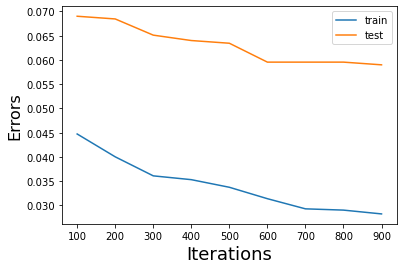

In [13]:
#Q.1.
plt.plot([j for j in range(100,1000,100)], train_plot[1:], label = "train")
plt.plot([j for j in range(100,1000,100)], test_plot[1:], label = "test")
plt.xlabel('Iterations', fontsize=18)
plt.ylabel('Errors', fontsize=16)
plt.legend()
plt.show()

In [16]:
alpha = 0.01
lam = [1,10,50,100,500]
train_error_list = []
test_error_list = []
for l in lam:    
    weights_reg, cost_reg = train(X_train, y_train,100,1, l)
    pred_train_reg = pred(weights_reg, X_train.to_numpy())
    train_acc_reg = accuracy(pred_train_reg,y_train)
    pred_test_reg = pred(weights_reg, X_test.to_numpy())
    test_acc_reg = accuracy(pred_test_reg,y_test)
    train_error_list.append(error(train_acc_reg))
    test_error_list.append(error(test_acc_reg))

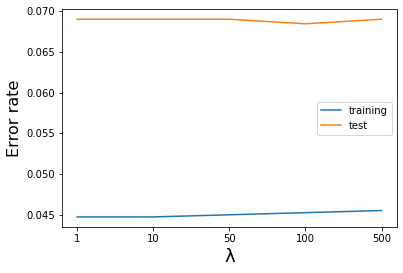

In [17]:
#Q.2 
plt.plot([str(i) for i in lam], train_error_list, label = "training")
plt.plot([str(i) for i in lam], test_error_list, label= "test")
plt.xlabel('λ', fontsize=18)
plt.ylabel('Error rate', fontsize=16)
plt.legend()
plt.show()